# Prediciton Using Supervised Model

### Problem Statement

### Predict the percentage of a student based on the no. of study hours.Simple Linear Regression task involving 2 variables

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Reading and loading the dataset

In [2]:
url =  "http://bit.ly/w-data"
df = pd.read_csv(url)
print('Data imported \n\nTop 5 rows')
df.head(5)

Data imported 

Top 5 rows


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the dataset')

There are 25 rows and 2 columns in the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print('There are',df.isnull().sum().sum(),'Null values in the dataset.')

There are 0 Null values in the dataset.


The median value of marks scored by students is 47.0
The median value of hours studied by students is 4.8


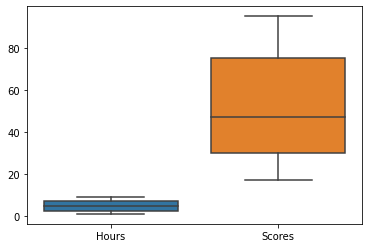

In [7]:
sns.boxplot(data = df);
print('The median value of marks scored by students is',df.Scores.median())
print('The median value of hours studied by students is',df.Hours.median())

There is high correlation between Marks scored and Hours studied.


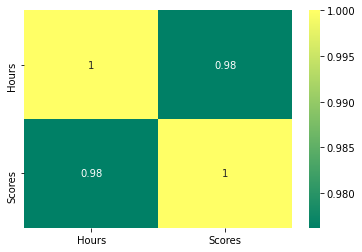

In [8]:
corr = df.corr()
sns.heatmap(corr,annot = True,cmap = 'summer')
print('There is high correlation between Marks scored and Hours studied.')

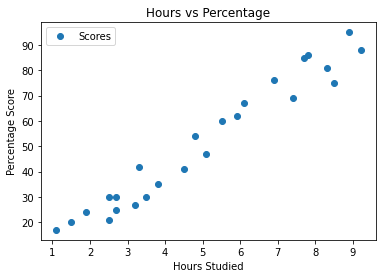

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### Splitting Train and Test dataset

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 0)

In [14]:
X_train.shape

(20, 1)

In [15]:
y_train.shape

(20,)

In [16]:
X_test.shape

(5, 1)

In [17]:
y_test.shape

(5,)

In [18]:
lr = LinearRegression()

## Training the model

In [19]:
lr = lr.fit(X_train,y_train)

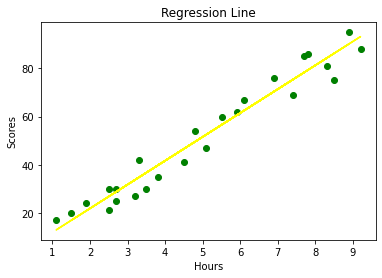

In [20]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y,color = 'green')
plt.plot(X, line,color = 'yellow');
plt.title('Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

###### Let us check the intercept for the model

In [21]:
coefficient = lr.coef_
print(f"The intercept for our model is {coefficient}")

The intercept for our model is [9.91065648]


In [22]:
intercept = lr.intercept_
print(f"The intercept for our model is {intercept}")

The intercept for our model is 2.018160041434683


## Prediction of the target variable (Scores)

In [23]:
ytrain_pred = lr.predict(X_train)
ytest_pred = lr.predict(X_test)

In [24]:
ytrain_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [37]:
# Comparing Actual vs Predicted
soln = pd.DataFrame({'hours':y_test, 'Actual': y_test, 'Predicted': ytest_pred})  
soln.head()

,hours,Actual,Predicted
0,20,20,16.884145
1,27,27,33.732261
2,69,69,75.357018
3,30,30,26.794801
4,62,62,60.491033


### Evaluation of metrics
### Accuracy

In [26]:
print('Accuracy of train set ',metrics.r2_score(y_train,ytrain_pred))

Accuracy of train set  0.9515510725211552


In [27]:
print('Accuracy of test set ',metrics.r2_score(y_test,ytest_pred))

Accuracy of test set  0.9454906892105356


###  RMSE

In [28]:
mse_train = metrics.mean_squared_error(y_train,ytrain_pred)
rmse_train = np.sqrt(mse_train)
print('Root Mean Square Error of train set :',rmse_train)

Root Mean Square Error of train set : 5.558613350226342


In [29]:
mse_test = metrics.mean_squared_error(y_test,ytest_pred)
rmse_test = np.sqrt(mse_test)
print('Root Mean Square Error of test set :',rmse_test)

Root Mean Square Error of test set : 4.6474476121003665


# Conclusion

# What will be predicted score if student studies for 9.25 hours per day?

In [31]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## INPUT THE HOURS STUDIED TO PREDICT THE SCORE !!!

In [41]:
hours = float(input("Enter the number of hours :"))
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the number of hours :9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


### END OF TASK 1